In [1]:
import numpy as np
from pathlib import Path
from importlib import reload

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
# custom libraries
import sys, os
sys.path.append(os.path.abspath('../../spaths'))
import spaths

In [205]:
# underlying OU process coefficients
def drift_ou(t, u, du):
    du[0] = 0.01
    du[1] = u[0] - u[1]

def dispersion_ou(t, u, du):
    du[0] = .01#np.sqrt(0.01)
    du[1] = 1.0#np.sqrt(1.0)

sde_ou = spaths.ItoSDE(drift_ou, dispersion_ou)

In [206]:
# seed setting and solver
seed = 3579
rng = np.random.default_rng(seed)
rng.integers(10**3);  # warm up of RNG

# stochastic solver
em = spaths.EulerMaruyama(rng)

In [207]:
# simulation params
dt = .05
x0, y0 = 3.0, 3.0
tspan = (0.0, 1000)

In [208]:
ens0 = np.array([[x0,y0]]) #spaths.make_ens(x0, y0)
sol_ou = em.solve(sde_ou, ens0, tspan, dt)

In [209]:
sol_ou.p.shape

(1, 20002, 2)

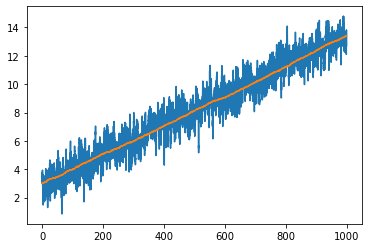

In [210]:
path = sol_ou.p[0]
plt.plot(sol_ou.t, path.T[1])
plt.plot(sol_ou.t, path.T[0]);

In [211]:
data = path[::10]

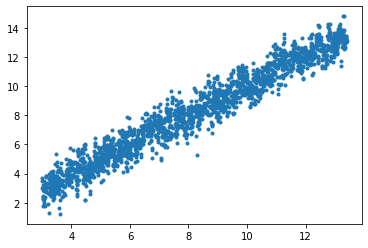

In [212]:
plt.plot(*data.T, '.');

In [213]:
# transformation
fwdF = lambda u: np.asarray([u[1], np.log(1+u[1])+np.sin(.5*(u[0] - u[1]))])

In [214]:
dataF = fwdF(data.T).T

In [215]:
dataF.shape

(2001, 2)

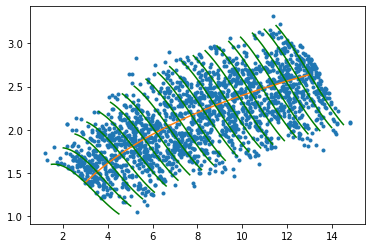

In [219]:
plt.plot(*dataF.T, '.');
x = np.linspace(3, 13, 100)
plt.plot(x, np.log(1+x)+np.sin(0));
for u0 in np.linspace(3, 13, 20):
    plt.plot(v:=np.linspace(u0-1.5, u0+1.5, 100), np.log(1+v)+np.sin(.5*(u0-v)), color='g')